# LSTM
This notebook lays out the LSTM neural network I used to obtain my results. It goes through preprocessing the text data, training the model, and output accuracy & loss graphs.

In [12]:
import pandas as pd

# Read Input

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

X_train, y_train = train["comment_text"], train[labels]
X_test, y_test = test["comment_text"], test[labels]

In [13]:
# Model Variables

embed_size = 32
max_features = 10000
maxlen = 200
batch_size = 1024

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Preprocess the text

tokenizer = Tokenizer(num_words=max_features,lower=True)
tokenizer.fit_on_texts(list(X_train))

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_tok, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_tok, maxlen=maxlen)

In [4]:
# Example of a tokenized input
print("--Text--")
print(X_train[10])
print("--Tokenized Output--")
print(X_train_padded[10])

--Text--
I am new to this site and I am not sure how to navigate it best.
--Tokenized Output--
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   6  71 115   2  13 293   4   6  71  14 192  70   2
  11 215]


In [5]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

# Build the model

model = Sequential()
model.add(Embedding(max_features,embed_size))
model.add(LSTM(embed_size))
model.add(Dense(len(labels), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics = ['accuracy'])

filepath='models/basic_LSTM_weights_best.hdf5'
checkpoint_callback = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train_padded, y_train, epochs = 10, batch_size = batch_size, 
                    validation_split=0.2, callbacks = [checkpoint_callback])

Train on 102124 samples, validate on 25532 samples
Epoch 1/10
101376/102124 [============================>.] - ETA: 0s - loss: 0.2969 - acc: 0.9510
Epoch 00001: val_acc improved from -inf to 0.96239, saving model to models/basic_LSTM_weights_best.hdf5
102124/102124 [==============================] - 60s 588us/step - loss: 0.2957 - acc: 0.9511 - val_loss: 0.1451 - val_acc: 0.9624
Epoch 2/10
101376/102124 [============================>.] - ETA: 0s - loss: 0.1371 - acc: 0.9637
Epoch 00002: val_acc improved from 0.96239 to 0.96254, saving model to models/basic_LSTM_weights_best.hdf5
102124/102124 [==============================] - 69s 680us/step - loss: 0.1372 - acc: 0.9637 - val_loss: 0.1360 - val_acc: 0.9625
Epoch 3/10
101376/102124 [============================>.] - ETA: 0s - loss: 0.1250 - acc: 0.9637
Epoch 00003: val_acc improved from 0.96254 to 0.96291, saving model to models/basic_LSTM_weights_best.hdf5
102124/102124 [==============================] - 76s 742us/step - loss: 0.1249 -

In [15]:
# Predict the test set

y_test_predicted = model.predict(X_test_padded, batch_size = batch_size, verbose = 1)

test[labels] = y_test_predicted

test.to_csv('submissions/test_basic_LSTM.csv', index=False)

31915/31915 [==============================] - 5s 171us/step


In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

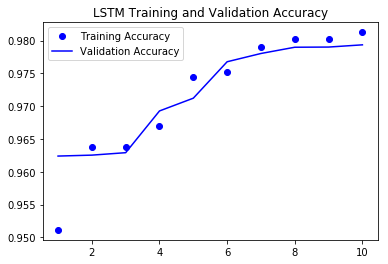

In [21]:
f = plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()
f.savefig("visuals/LSTM_accuracy.pdf")

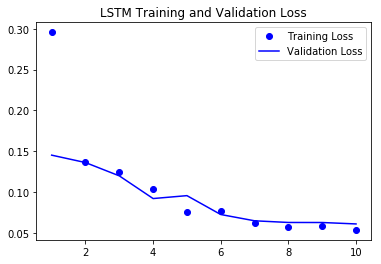

In [20]:
f = plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
f.savefig("visuals/LSTM_loss.pdf")